# Analyze the loss based on the simulations runtime

In [1]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

os.environ['JAX_PLATFORM_NAME'] = "cpu"
os.environ['JAX_PLATFORMS'] = "cpu"

In [2]:
import jax.numpy as jnp
import jax

import numpy as onp

import matplotlib.pyplot as plt

from simulation.simulate_full import run_entire_simulation

from analyzers import defaultvalues as dv, database, loss as loss_anaylzer

/home/florian/anaconda3/envs/jaxidp/lib/python3.11/site-packages/google/colab/data_table.py:30: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  from IPython.utils import traitlets as _traitlets


In [12]:
scan_space = jnp.linspace(3.0000, 3.0001, 8)
nsimulation_values = onp.arange(1, 75)

In [13]:
def get_sim_result(lj_sigma_oo, key):
    return run_entire_simulation(lj_sigma_oo, dv.N_STEPS, dv.N_MOLECULES_PER_AXIS, dv.N_SNAPSHOTS, dv.N_Q, key)

In [3]:
database.set_filename("../data/loss_analyzer/nsimulations_scan.npz")

Calculate losses over the scan space for each runtime from the array

In [ ]:
all_losses = []

for n_simulation in nsimulation_values:
    existing_keys = database.get_existing_keys()
    if n_simulation in existing_keys:
        print(f"Skipping simulation {n_simulation}, was already computed")
        continue

    print(f"=== Running simulation {n_simulation} ===")
    reference = get_sim_result(dv.LJ_SIGMA_OO, n_simulation)

    losses = jax.vmap(lambda lj_sigma_oo: loss_anaylzer.L1_loss(get_sim_result(lj_sigma_oo, n_simulation), reference))(scan_space)

    database.save_intermediate_result(n_simulation, onp.array(losses))

=== Running simulation 1 ===
=== Running simulation 2 ===
=== Running simulation 3 ===
=== Running simulation 4 ===
=== Running simulation 5 ===
=== Running simulation 6 ===
=== Running simulation 7 ===
=== Running simulation 8 ===
=== Running simulation 9 ===
=== Running simulation 10 ===
=== Running simulation 11 ===
=== Running simulation 12 ===
=== Running simulation 13 ===
=== Running simulation 14 ===
=== Running simulation 15 ===
=== Running simulation 16 ===
=== Running simulation 17 ===
=== Running simulation 18 ===
=== Running simulation 19 ===
=== Running simulation 20 ===
=== Running simulation 21 ===
=== Running simulation 22 ===
=== Running simulation 23 ===
=== Running simulation 24 ===
=== Running simulation 25 ===
=== Running simulation 26 ===
=== Running simulation 27 ===


# Plot
Skip previous if data is already available

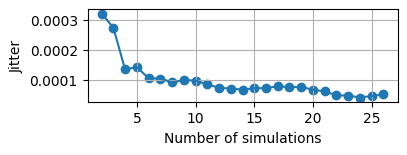

In [5]:
keys, values = database.load_result()

jitter_values = []
for i in range(len(keys)):
    ix_keys = onp.arange(i) # onp.random.choice(keys, i) - 1
    selected_values = values[ix_keys.astype(int)]
    average_loss = jnp.mean(selected_values, axis=0)
    jitter = loss_anaylzer.get_loss_jitter(average_loss)
    jitter_values.append(jitter)

plt.plot(keys, jitter_values)
plt.scatter(keys, jitter_values)
plt.xlabel("Number of simulations")
plt.ylabel("Loss-Jitter")
plt.grid()
plt.gcf().set_size_inches(4, 1.2)

plt.savefig("../plots/analysis_loss_nsimulations.svg")
plt.show()